# Plot and Spikesort Backyard Brains Recordings

This notebook provides code to:

1. Import the wave file recorded with Spike Recorder
2. Plot the raw data
3. Determine a reasonable spike threshold
4. Detect spikes based on that threshold
5. Plot the raw waveforms & waveform features for detected spikes

*Note*: This code relies on several helper functions in `spikesorting_helperfunctions.py`. Please make sure this file is in the same folder as this notebook.

<hr>

## Setup

In [46]:
# Import packages we need 
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # configure high-resolution plotting
%run spikesorting_helperfunctions.py # import several helper functions for this analysis

## Import wav file recorded with Spike Recorder

In [2]:
from scipy.io.wavfile import read
byb_file = read('BYB_recording.wav')
signal = np.array(byb_file[1],dtype=float)
sampling_freq = 10000 # SpikeRecorder acquires data at 10 kHz

## Plot the raw data

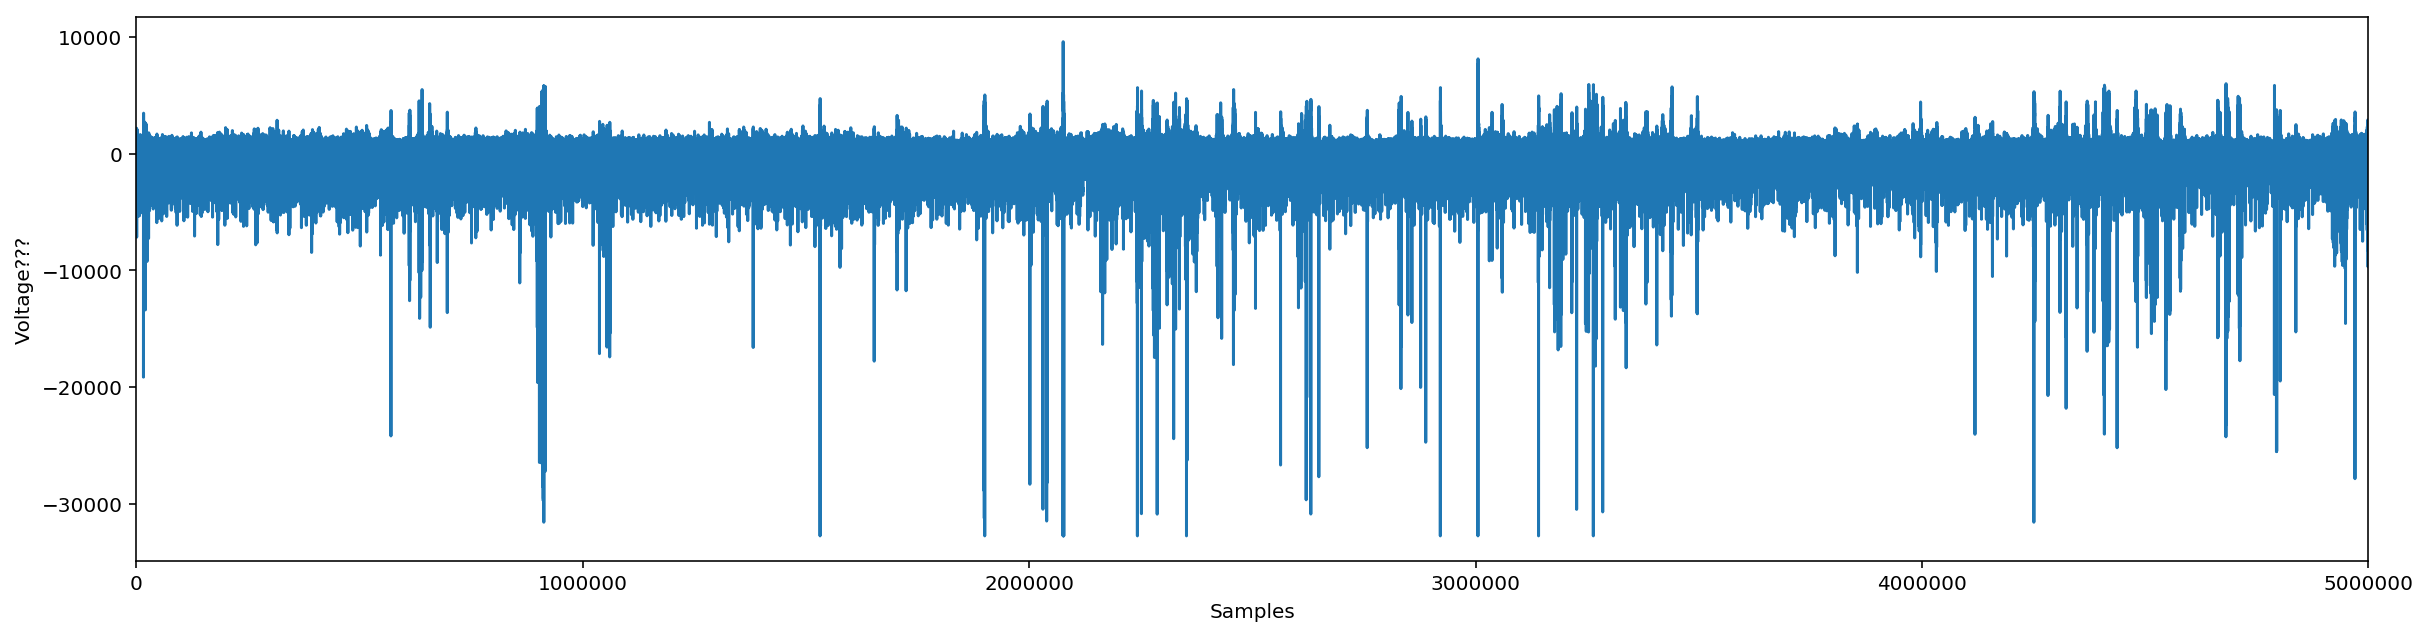

In [59]:
fig = plt.figure(figsize=(20,5))
plt.plot(signal)
plt.xlabel('Samples')
plt.ylabel('Voltage???')
plt.xlim([0,len(signal)])
plt.show()

In [49]:
noise_std = np.std(signal)
noise_mad = np.median(np.absolute(signal)) / 0.6745
recommended_threshold = -5 * noise_mad
print('Noise Estimate by Standard Deviation: {0:g} V'.format(noise_std))
print('Noise Estimate by MAD Estimator     : {0:g} V'.format(noise_mad))
print('Spike Threshold                     : {0:g} V'.format(spike_threshold))

Noise Estimate by Standard Deviation: 819.843 V
Noise Estimate by MAD Estimator     : 468.495 V
Spike Threshold                     : -4684.95 V


## Determine a reasonable threshold & plot

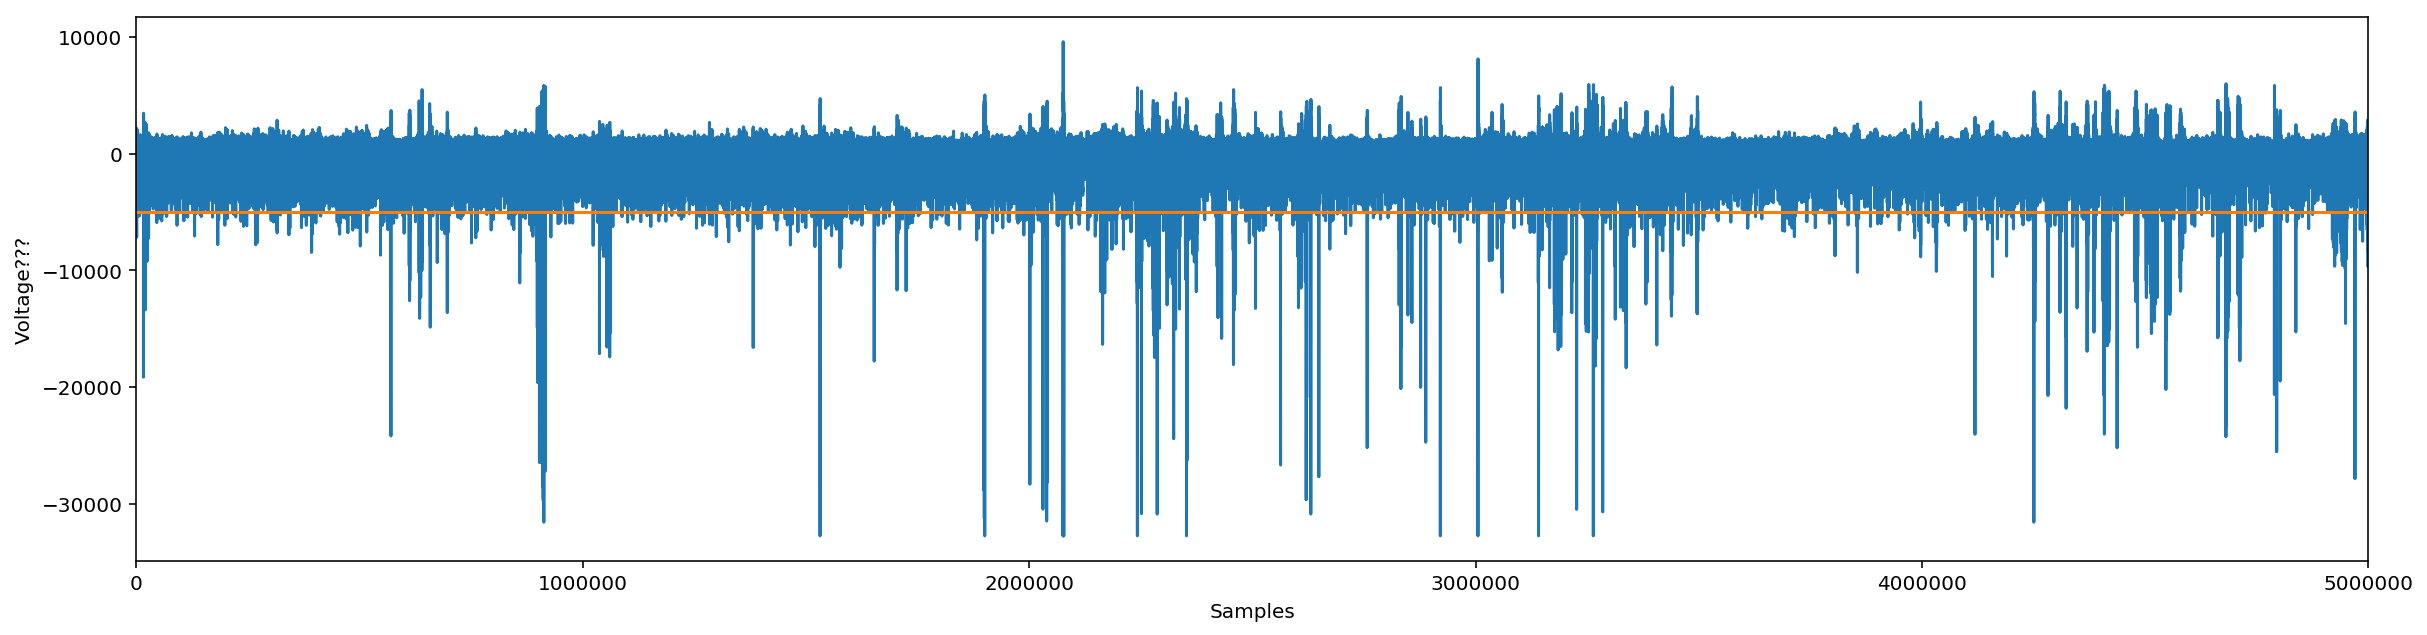

In [63]:
spike_threshold = -5000

fig = plt.figure(figsize=(20,5))
plt.plot(signal)
plt.xlabel('Samples')
plt.ylabel('Voltage???')
plt.plot([0, len(signal)], [spike_threshold, spike_threshold]) # add *1e6 to convert the threshold to µV for plotting
plt.xlim([0,len(signal)])
plt.show()

## Detect spikes and plot

In [64]:
crossings = detect_threshold_crossings(signal, sampling_freq, spike_threshold, 0.003) # dead time of 3 ms
spks = align_to_minimum(signal, sampling_freq, crossings, 0.002) # search range 2 ms

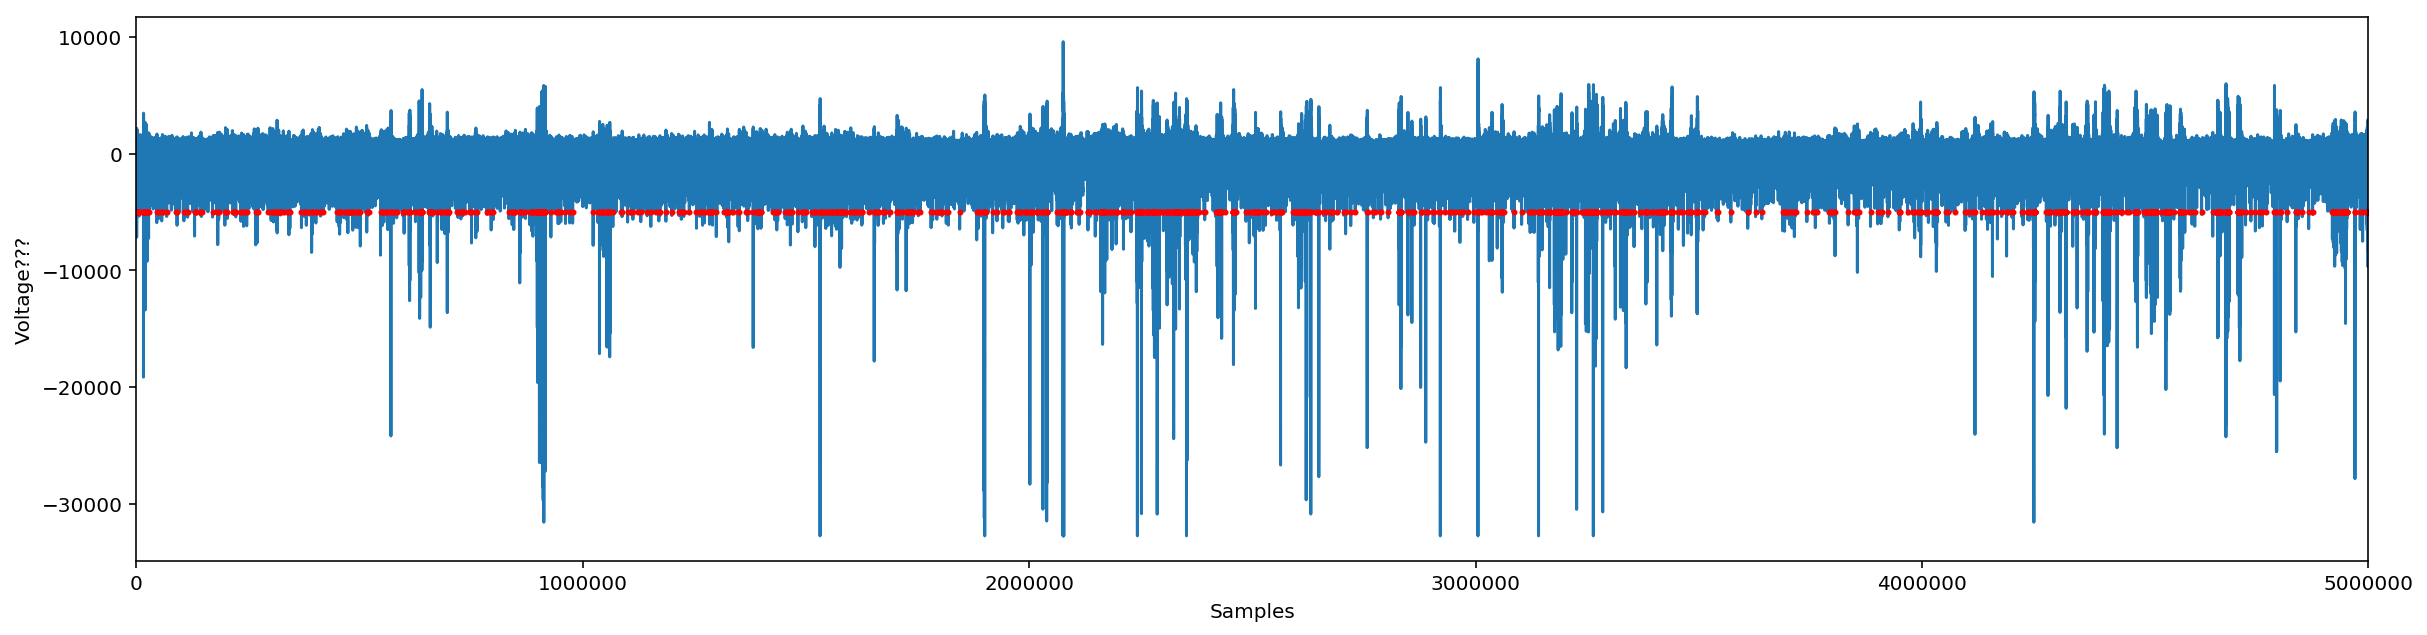

In [65]:
fig = plt.figure(figsize=(20,5))
plt.plot(signal)
plt.xlabel('Samples')
plt.ylabel('Voltage???')
plt.plot(spks, [spike_threshold]*spks.shape[0], 'ro', ms=2)
plt.xlim([0,len(signal)])
plt.show()

## Extract Waveforms

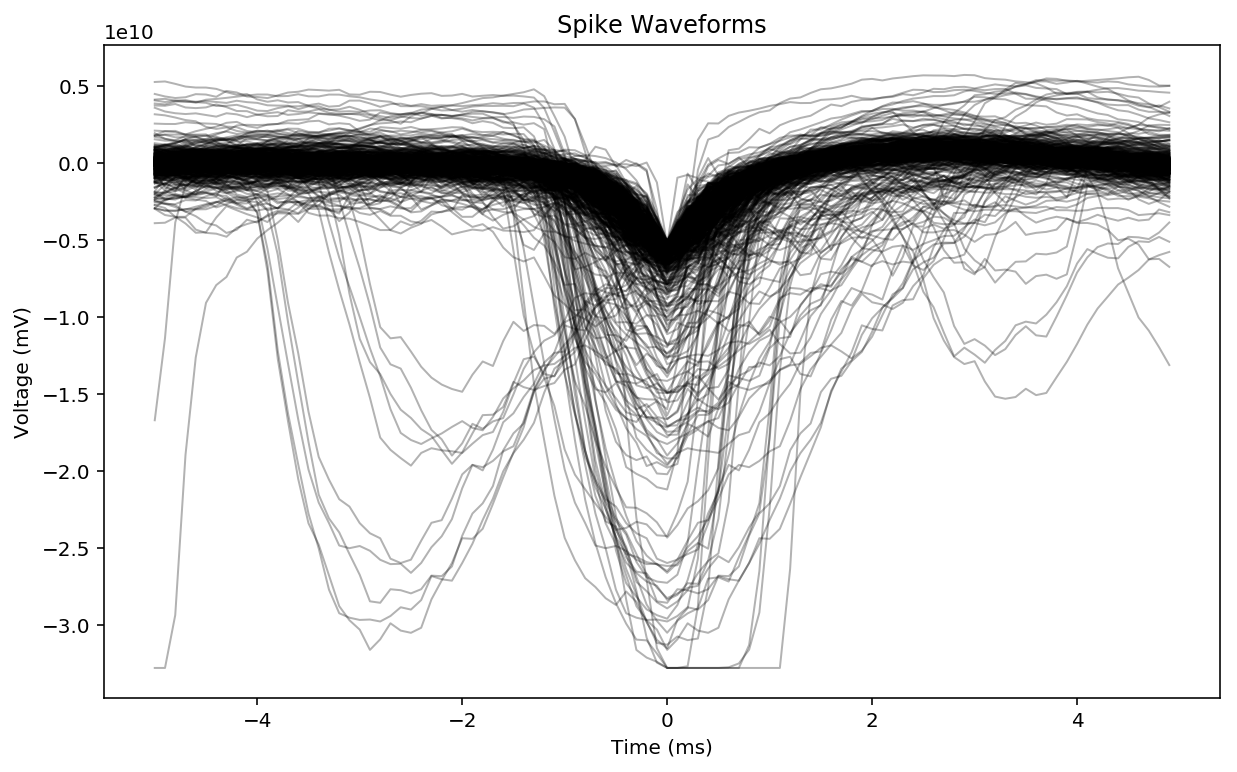

In [70]:
pre = 0.005 # 5 ms
post= 0.005 # 5 ms
waveforms = extract_waveforms(signal, sampling_freq, spks, pre, post)
plot_waveforms(waveforms, sampling_freq, pre, post, n=500)

## Compute autocorrelation

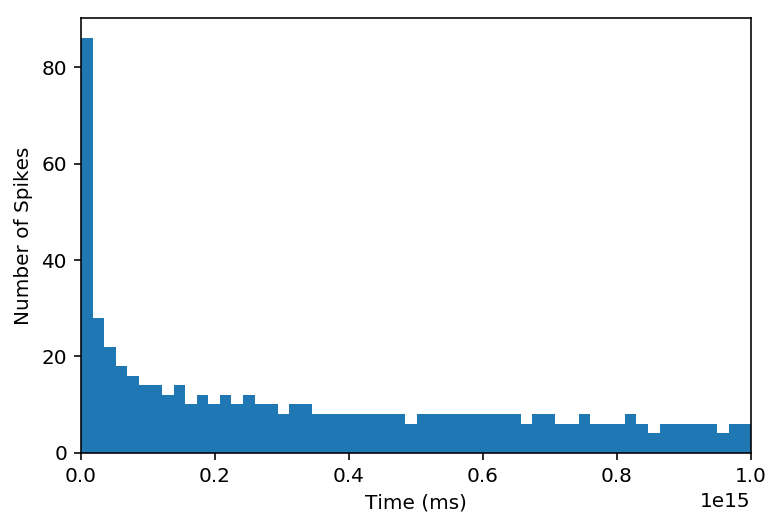

In [89]:
autocorrelation = np.correlate(spks,spks,mode='full')
autocorrelation

plt.hist(autocorrelation,bins=1000)
plt.xlim([0,1e15])
plt.ylabel('Number of Spikes')
plt.xlabel('Time (ms)')
plt.show()

## Feature Extraction

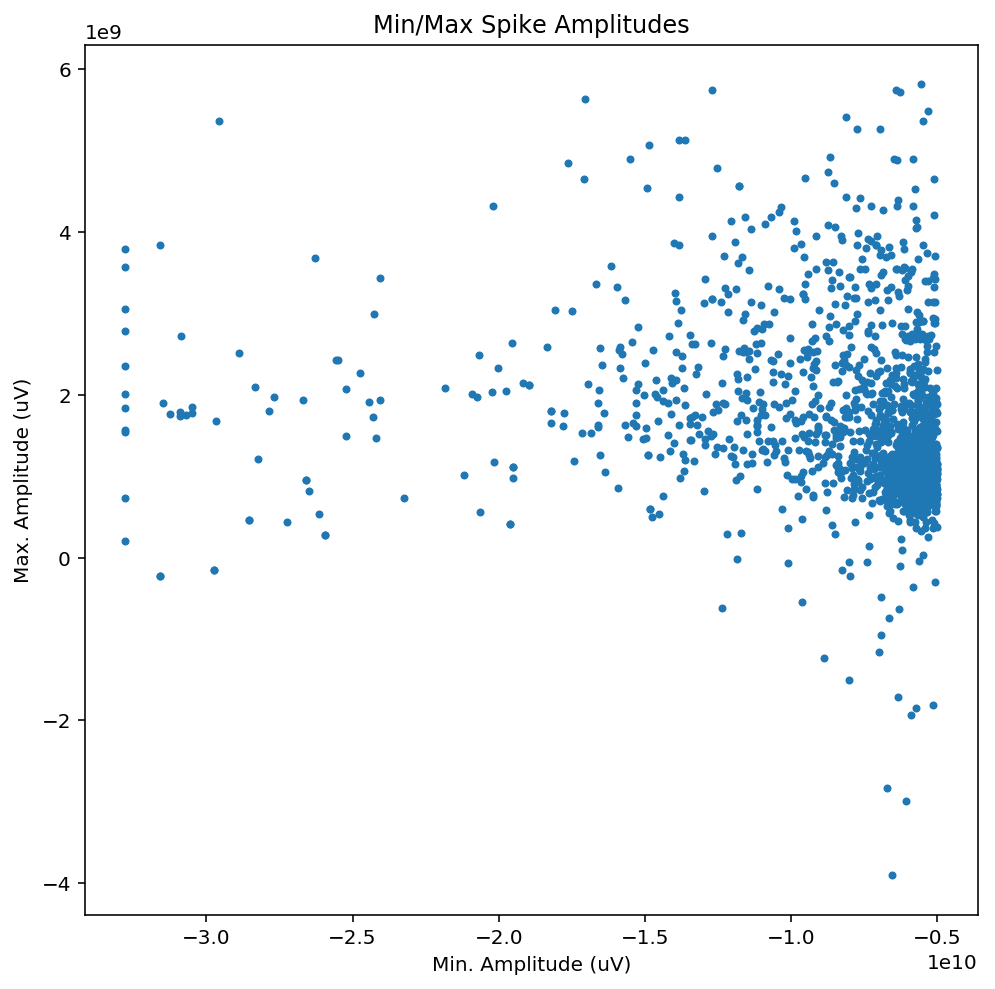

In [90]:
min_amplitude = np.amin(waveforms, axis=1)
max_amplitude = np.amax(waveforms, axis=1)

plt.figure(figsize=(8,8))
plt.plot(min_amplitude*1e6, max_amplitude*1e6,'.')
plt.xlabel('Min. Amplitude (uV)')
plt.ylabel('Max. Amplitude (uV)')
plt.title('Min/Max Spike Amplitudes')

plt.show()

## About this notebook
This notebook was largely inspired by [this tutorial](https://mcspydatatools.readthedocs.io/en/latest/McsPy-Tutorial_DataAnalysis.html).